In [1]:
import urllib
import json

In [2]:
# grab the base data
DANE_URL = "https://opendata.arcgis.com/datasets/b913e9591eae4912b33dc5b4e88646c5_10.geojson?where=GEO%20%3D%20'County'%20AND%20NAME%20%3D%20'Dane'"
response = urllib.request.urlopen(DANE_URL)
dane_data = json.loads(response.read())
data_elems = dane_data['features']
# and pull out important values
new_neg = [el['properties']['NEG_NEW'] for el in data_elems]
new_pos = [el['properties']['POS_NEW'] for el in data_elems]

In [3]:
# now strip off missing data points from the front
def first_non_none(vals):
    for i in range(len(vals)):
        if vals[i] is not None:
            return i
    return len(vals)

# just in case one or the other has more missing samples
neg_start = first_non_none(new_neg)
pos_start = first_non_none(new_pos)
start = max(neg_start, pos_start)
# and reduce
new_neg = new_neg[start:]
new_pos = new_pos[start:]
new_tot = [new_neg[i] + new_pos[i] for i in range(len(new_neg))]
new_pos_perc = [float(new_pos[i]) / new_tot[i] for i in range(len(new_tot))]

In [4]:
# now get some sliding window sums for averaging
def sliding_window_sum(vals, window_size):
    # check for degenerate case
    if len(vals) < window_size:
        return [sum(vals)]
    # otherwise track each
    ret_sums = list()
    # get initial sum
    curr_sum = sum(vals[:window_size])
    ret_sums.append(curr_sum)
    # and iterate to the end
    i = window_size
    while i < len(vals):
        # take off the one before the window
        curr_sum -= vals[i - window_size]
        # and add the new val into the window
        curr_sum += vals[i]
        ret_sums.append(curr_sum)
        i += 1
    return ret_sums

In [5]:
# get a 7-day sliding average of positive percentages
new_tot_7win = sliding_window_sum(new_tot, 7)
new_pos_7win = sliding_window_sum(new_pos, 7)
new_pos_perc_7win = [float(new_pos_7win[i]) / new_tot_7win[i] for i in range(len(new_tot_7win))]

In [6]:
# grab last 8 weeks of real percentages and average
pos_perc_8wk = new_pos_perc[-56:]
pos_perc_8wk_7win = new_pos_perc_7win[-56:]

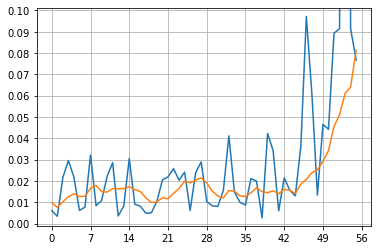

In [7]:
import matplotlib.pyplot as plt
# and plot
plt.plot(pos_perc_8wk)
plt.plot(pos_perc_8wk_7win)
plt.xticks([0, 7, 14, 21, 28, 35, 42, 49, 56])
plt.yticks([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.ylim([-0.001, 0.101])
plt.grid()
plt.show()

In [8]:
pos_perc_8wk

[0.0061162079510703364,
 0.0034782608695652175,
 0.021739130434782608,
 0.029585798816568046,
 0.021806853582554516,
 0.006211180124223602,
 0.007772020725388601,
 0.03217821782178218,
 0.008438818565400843,
 0.010851419031719533,
 0.022181146025878003,
 0.028616852146263912,
 0.0036101083032490976,
 0.00821917808219178,
 0.030555555555555555,
 0.009122807017543859,
 0.00819672131147541,
 0.004891684136967156,
 0.005089058524173028,
 0.010568031704095112,
 0.020553359683794466,
 0.02193419740777667,
 0.025787965616045846,
 0.02040816326530612,
 0.02418379685610641,
 0.006180469715698393,
 0.023923444976076555,
 0.028985507246376812,
 0.010401188707280832,
 0.008376963350785341,
 0.008100147275405008,
 0.015521064301552107,
 0.041193181818181816,
 0.014891179839633447,
 0.01,
 0.00878972278566599,
 0.021164021164021163,
 0.01994134897360704,
 0.002702702702702703,
 0.0423572744014733,
 0.03418803418803419,
 0.006006006006006006,
 0.021505376344086023,
 0.015682656826568265,
 0.013036809